<a href="https://colab.research.google.com/github/abhi1628/DS-ML-Projects/blob/main/Data_Science_Day_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd # data analytics
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization
from sklearn.preprocessing import LabelEncoder # used to convert non numeric to numeric data
from sklearn.model_selection import train_test_split # used to split data in training and testing
from sklearn.ensemble import RandomForestClassifier # ML algorithm
from sklearn.metrics import accuracy_score, confusion_matrix # check performance of ML model

In [22]:
# Load data
data = pd.read_csv('/content/Titanic-Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
data.head() # display all columns and 1st 5 rows

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
survival_counts = data['Survived'].value_counts()
survival_counts

,count
Survived,
0,549
1,342


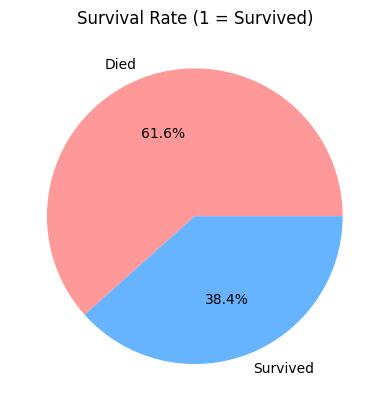

In [25]:
plt.pie(
    survival_counts,
    labels=['Died', 'Survived'],
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff']
)
plt.title('Survival Rate (1 = Survived)')
plt.show()

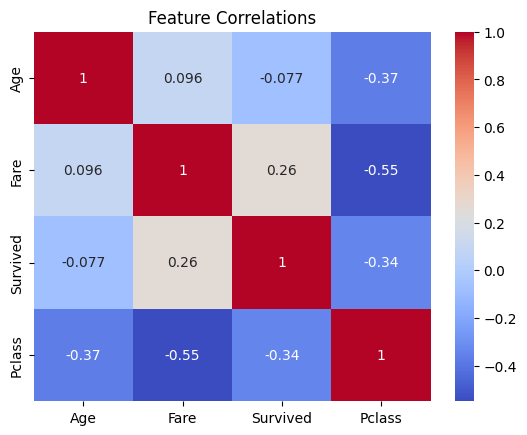

In [26]:
# Select numeric features
numeric_features = data[['Age', 'Fare', 'Survived', 'Pclass']]
corr = numeric_features.corr()

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
)
plt.title('Feature Correlations')
plt.show()

In [27]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Gender,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [28]:
data.Embarked

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [29]:
data['Embarked']

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [30]:
data.Embarked.value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [31]:
# Handle missing values
data.drop('Cabin', axis=1, inplace=True)
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [32]:
data.Embarked.value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [33]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Gender,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Encode categoricals
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0
data['Embarked'] = le.fit_transform(data['Embarked'])

# Final features
features = ['Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 82.12%


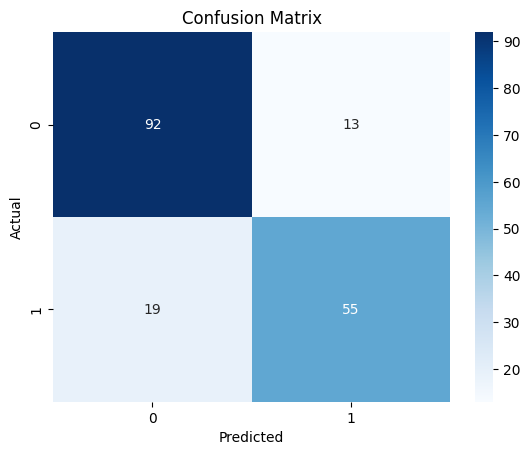

In [12]:
# Predictions
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Example: Predict survival for a new passenger
new_passenger = pd.DataFrame({
    'Pclass': [3],       # 3rd class
    'Gender': [1],          # Male
    'Age': [25],
    'SibSp': [0],        # Add default value (0 siblings/spouses)
    'Parch': [0],         # Add default value (0 parents/children)
    'Fare': [7.25],
    'Embarked': [0]      # Southampton
})

prediction = model.predict(new_passenger)
print("Survived?" , "Yes" if prediction[0] == 1 else "No")

Survived? No
